## Run a RF model for each variable and obtain the importances and interactions between the variables. 

## Code RF

In [7106]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import PartialDependenceDisplay
from openpyxl import Workbook
import os

In [7107]:
# Cargar los datos desde los archivos CSV exportados
indep_variables_no_ceros = pd.read_csv('../DataIntermediate/combined_data_indep_variables_indeg_outdeg.csv', sep=',')
dep_variables_no_ceros = pd.read_csv('../DataIntermediate/combined_data_dep_variables_indeg_outdeg.csv', sep=',')

# Vista previa de los datos cargados
dep_variables_no_ceros.head()

,id,Degree_Rede_EntreajudaLabur,OutDeg_Var.Dep_RedeControlExtAusencia,Indeg_Var.Dep_RedeControlExtAusencia,OutDeg_Var.Dep_ApoioSpecDiqCint,Indeg_Var.Dep_ApoioSpecDiqCint,OutDeg_Var.Dep_ApoioSpecTubos,Indeg_Var.Dep_ApoioSpecTubos,OutDeg_Var.Dep_RedApoiLevntDiCin,Indeg_Var.Dep_RedApoiLevntDiCin,...,OutDeg_RedeRepar_DiqPriqDiqCint,Indeg_RedeRepar_DiqPriqDiqCint,OutDeg_Red-Val_Cont1Rep2DiqCin,Indeg_Red-Val_Cont1Rep2DiqCin,OutDeg_Red-Val_Cont1Rep2DiqPrq,Indeg_Red-Val_Cont1Rep2DiqPrq,OutDeg_ContRep2_DiqPrqCin,Indeg_ContRep2_DiqPrqCin,OutDeg_Var.Dep_RedePartilhaAgu,Indeg_Var.Dep_RedePartilhaAgu
0,Aiace Quior,7,0,1,1,4,0,2,2,1,...,2,0,0,1,4,1,4,1,1,0
1,Alamada Bia,2,2,2,1,4,0,2,0,0,...,1,2,0,0,2,4,2,4,0,0
2,Alanghate Mfumba,10,1,1,1,0,0,0,0,0,...,0,1,0,0,0,3,0,3,0,0
3,Albat Calabus,10,2,0,1,2,0,0,0,0,...,1,2,0,0,2,4,2,4,0,0
4,Americano Mbunde,19,0,1,0,1,0,2,0,0,...,0,2,0,0,0,4,0,4,0,0


In [7108]:

from sklearn.preprocessing import LabelEncoder
# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Lista de columnas a transformar
columns_to_encode = ['1_VarExp_Moranca', '2_VarExp_Atri_Tabanca']

# Aplicar LabelEncoder a cada columna en la lista
for col in columns_to_encode:
    indep_variables_no_ceros[col] = label_encoder.fit_transform(indep_variables_no_ceros[col])



### Acá es dónde vas a filtrar las variables independientes

Si vas a eliminar variables para modelar es aquí donde debes hacerlo

In [ ]:
variables = [
    'id',
                 #'Indeg_RedConfltAgu',
                 #'Degree_IntimAmigUnd',
                                         'Indeg_IntimAmigos_',
 'Indeg_RedeRisk_Cen',
# 
 #'Degree_RedeConflitA',
 #'Degree_RedeConflitG',
 #'Indeg_VendaParcela',
 # 'Indeg_EmprestParce',
 'PC1_Distance_Pro',
  #           'Avg_Distancia_Dist_moranza',
 'Degree_RedeTotFamil',
                                '1_VarExp_Moranca',
  #                            '2_VarExp_Atri_Tabanca',
   #  '3_VarExp_Atri_Fanado',
#                          '4_VarExp_Atri_CargosWM',
 #'5_VarExp_Atri_Idade',
#   '7_VarExp_Atri_IndForcaFugon',
                          '8_VarExp_Atri_IndInvestDiq',
  '9_VarExp_Atri_IndMelhorTecnDiqCint',
  '10_VarExp_Atri_MelhorTecnTubos', 
                                 'Area_bolanha',
     # OUTDEG variables
  # 'OutDeg_IntimAmigos_',
   'OutDeg_RedeRisk_Cen',
    #'OutDeg_RedConfltAgu',
 #  
    ###'OutDeg_VendaParcela',
    ##'OutDeg_EmprestParce'
    ]


#All variables + Description
# variables = [
#     'id',
#     'Degree_RedConfliAgua' = Water management (past and present) conflicts degree,
#     'Degree_RedIrmonsPr' = cousins degree,
#     'Indeg_TiospatermC' = paternal uncles in-degree,
#     'Indeg_TiosMaternos' = maternal uncles in-degree,
#     'Indeg_IntimAmigos_' = Close friends in-degree,
#     'Indeg_RedeRisk_Cen' = Water management risks in-degree ,
#     'Degree_RedeConflitA' =	Water management (ongoing) conflicts degree,
#     'Indeg_VendaParcela' = Lend rice paddies in-degree ,
#     'Indeg_EmprestParce' = Mortgaged rice paddies in-degree,
#     'PC1_Distance_Pro' = Principal Component Analysis (PCA) of the average distances between all plots cultivated by farmers,
#     'Avg_Distancia_Dist_moranza' = average distance from home to cultivated HHs´ clustered plots,
#     'Degree_RedeTotFamil' = Close family degree,	 
#     '1_VarExp_Moranca' = participant compound,
#     '2_VarExp_Atri_Tabanca' = participant village,
#     '3_VarExp_Atri_Fanado' = undergone the adult initiation ceremony (or 'fanado'),
#     '4_VarExp_Atri_CargosWM' = participant belongs to the water management committee ,
#     '5_VarExp_Atri_Idade' = participant age,
#     '7_VarExp_Atri_IndForcaFugon' = 'Household Labour for Water Management' (HLWM),
#     '8_VarExp_Atri_IndInvestDiq' = Indicator of dike investment level ,
#     '9_VarExp_Atri_IndMelhorTecnDiqCint' = Indicator of the reputation as great dike specialists,
#     '10_VarExp_Atri_MelhorTecnTubos' = Indicator of the reputation as great tube technicians ,
#     'Area_bolanha' = total area of rice paddies,
#     'OutDeg_RedeRisk_Cen' = Water management risks out-degree ,
#     'OutDeg_VendaParcela'= Close friends out-degree,
#     'OutDeg_EmprestParce' = Mortgaged rice paddies out-degree,
#     'OutDeg_TiospatermC' = paternal uncles out-degree,
#     'OutDeg_TiosMaternos' = maternal uncles out-degree   ]


In [7110]:
indep_variables_no_ceros = indep_variables_no_ceros[variables]

indep_variables_no_ceros.head()

,id,Indeg_IntimAmigos_,Indeg_RedeRisk_Cen,PC1_Distance_Pro,Degree_RedeTotFamil,1_VarExp_Moranca,8_VarExp_Atri_IndInvestDiq,9_VarExp_Atri_IndMelhorTecnDiqCint,10_VarExp_Atri_MelhorTecnTubos,Area_bolanha,OutDeg_RedeRisk_Cen
0,Aiace Quior,6,3,5929.470888,6,56,3,3,0,2.3644,3
1,Alamada Bia,1,0,4359.965205,0,1,1,0,0,0.5087,0
2,Alanghate Mfumba,2,0,5700.390367,2,29,4,3,1,1.4640,0
3,Albat Calabus,2,0,-1160.716385,2,48,4,3,0,1.5186,1
4,Americano Mbunde,1,0,-1254.279547,5,22,2,1,0,0.2500,0


Variables dependientes: 

1. Considerando que lo mejor es analizar una a una para ver importancias e interacciones en el modelo de RF, debe copiar una de la variables de la lista y ponerla (dentro de las comillas simples) en la siguiente celda en la variable: *'variable_a_predecir = dep_variables_no_ceros['']'*

2. Lista: 
- Degree_Rede_EntreajudaLabur 

- Indeg_Var.Dep_RedeControlExtAusencia	
- Indeg_Var.Dep_ApoioSpecDiqCint	
- Indeg_Var.Dep_ApoioSpecTubos	
- Indeg_Var.Dep_RedApoiLevntDiCin	
- Indeg_RedCont_DiqPriqDiqCint	
- Indeg_RedeRepar_DiqPriqDiqCint	
- Indeg_Red-Val_Cont1Rep2DiqCin	
- Indeg_Red-Val_Cont1Rep2DiqPrq	
- Indeg_ContRep2_DiqPrqCin 
- Indeg_Var.Dep_RedePartilhaAgu

- OutDeg_Var.Dep_RedeControlExtAusencia	
- OutDeg_Var.Dep_ApoioSpecDiqCint	
- OutDeg_Var.Dep_ApoioSpecTubos	
- OutDeg_Var.Dep_RedApoiLevntDiCin	
- OutDeg_RedCont_DiqPriqDiqCint	
- OutDeg_RedeRepar_DiqPriqDiqCint	
- OutDeg_Red-Val_Cont1Rep2DiqCin	
- OutDeg_Red-Val_Cont1Rep2DiqPrq	
- OutDeg_ContRep2_DiqPrqCin 
- OutDeg_Var.Dep_RedePartilhaAgu

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


variable_a_predecir = dep_variables_no_ceros['OutDeg_ContRep2_DiqPrqCin']

# Definir la variable dependiente y las variables independientes
X = indep_variables_no_ceros.drop(columns=['id'])
y = variable_a_predecir

y.head()


#List of all dependent/responses variables:
#Indeg_Var.Dep_RedeControlExtAusencia = Cooperation for controlling dikes in case of prolonged absence in-degree 
#Indeg_Var.Dep_RedApoioLevantDiCin =	Cooperation for dike maintenance in-degree 
#Indeg_Var.Dep_Cont1Rep2DiqCin = Cooperation for dike monitoring and repair in-degree 
#Indeg_Var.Dep_ApoioSpeDiqCint = Cooperation in technical advice and support for complex belt dike works in-degree
#Indeg_Var.Dep_ApoioSpeTubos = Cooperation in technical advice and support for installing PVC drainage pipes in-degree
#Outdeg_Var.Dep_RedeControlExtAusencia = Cooperation for controlling dikes in case of prolonged absence out-degree 
#Outdeg_Var.Dep_RedApoioLevantDiCin =	Cooperation for dike maintenance out-degree 
#Outdeg_Var.Dep_Cont1Rep2DiqCin = Cooperation for dike monitoring and repair out-degree 
#Outdeg_Var.Dep_ApoioSpeDiqCint = Cooperation in technical advice and support for complex belt dike works out-degree
#Outdeg_Var.Dep_ApoioSpeTubos = Cooperation in technical advice and support for installing PVC drainage pipes out-degree

0    4
1    2
2    0
3    2
4    0
Name: OutDeg_ContRep2_DiqPrqCin, dtype: int64

In [7127]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)    # 0.23: 9 / 

# Escalar las variables independientes
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo Random Forest
rf = RandomForestRegressor(n_estimators=150, random_state=11)
rf.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred_train = rf.predict(X_train_scaled)
y_pred_test = rf.predict(X_test_scaled)

# Redondear las predicciones a enteros
y_pred_train = np.round(y_pred_train).astype(int)
y_pred_test = np.round(y_pred_test).astype(int)


Mean Squared Error: 5.0000
R^2 Score: 0.8792


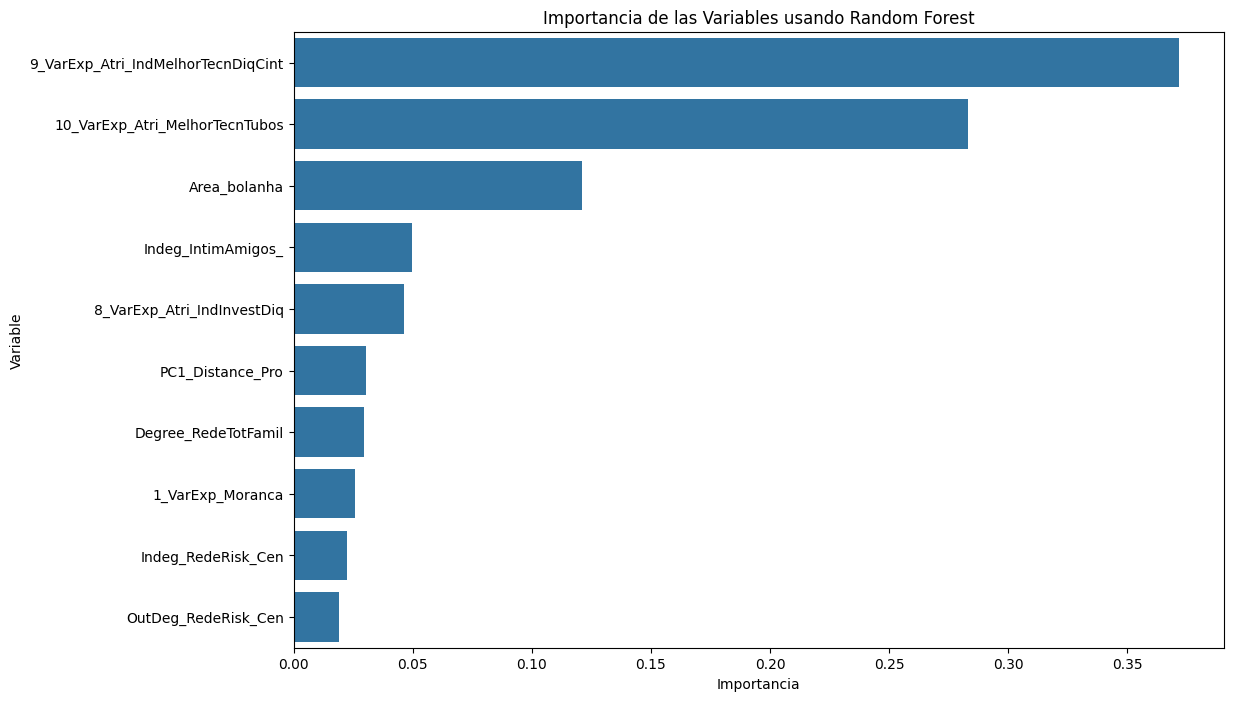

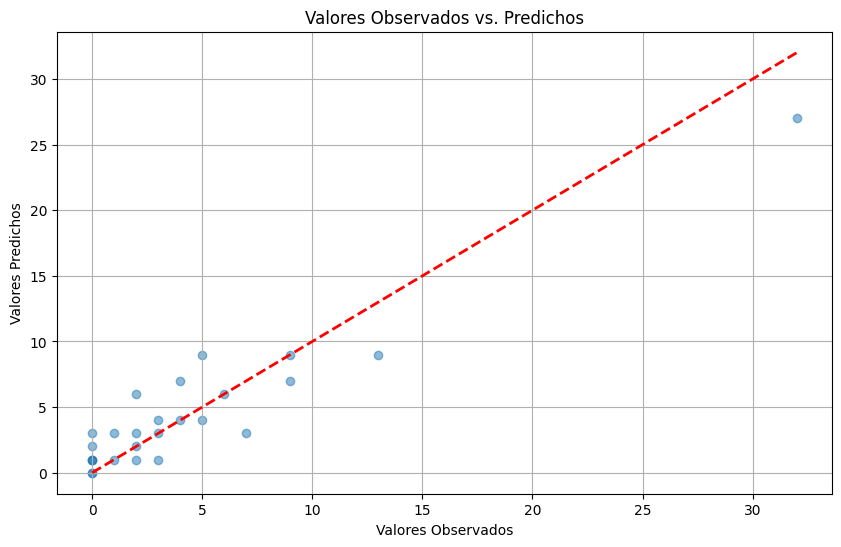

In [7128]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Calcular el MSE
mse = mean_squared_error(y_test, y_pred_test)

# Calcular R^2 manualmente (este valor hermano debería ser el correcto)
y_mean = np.mean(y_test)
ss_total = np.sum((y_test - y_mean) * (y_test - y_mean))
ss_residual = np.sum((y_test - y_pred_test) * (y_test - y_pred_test))
r2 = 1 - (ss_residual / ss_total)

n = len(y_test)
p = X_test_scaled.shape[1]

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Calcular la importancia de las variables
importances = rf.feature_importances_
importance_df = pd.DataFrame({'Variable': X.columns, 'Importancia': importances})
importance_df = importance_df.sort_values(by='Importancia', ascending=False)

# Crear un gráfico de las importancias de las variables
plt.figure(figsize=(12, 8))
sns.barplot(x='Importancia', y='Variable', data=importance_df)
plt.title('Importancia de las Variables usando Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()

# Crear un gráfico de Valores Observados vs. Predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Valores Observados vs. Predichos')
plt.xlabel('Valores Observados')
plt.ylabel('Valores Predichos')
plt.grid(True)
plt.show()


In [7129]:
# Guardar los valores observados y predichos en un archivo Excel
resultados_df = pd.DataFrame({
    'Valores Observados': y_test,
    'Valores Predichos': y_pred_test
})

# Ruta del archivo Excel
ruta_archivo = '../Pruebas/resultados_observados_vs_predichos_all_indeg_outdeg.xlsx'
resultados_df.to_excel(ruta_archivo, index=False)
print(f"Valores observados y predichos guardados en {ruta_archivo}")

Valores observados y predichos guardados en ../Pruebas/resultados_observados_vs_predichos_all_indeg_outdeg.xlsx


In [7130]:
# Definir la ruta de salida
output_path_importances = "../Pruebas/importances_all_indeg_outdeg.csv"
os.makedirs("../Pruebas/", exist_ok=True)

# Guardar las 10 interacciones más altas en un archivo CSV

importance_df.to_csv(output_path_importances, index=True)

In [7131]:
from sklearn.inspection import partial_dependence

variables = X.columns

# Calcular la importancia y la dirección de las interacciones
interaction_importances = []

for i in range(len(variables)):
    for j in range(i + 1, len(variables)):
        pdp = partial_dependence(rf, X_train_scaled, features=[i, j], kind="average")
        pdp_values = pdp['average'][0]
        
        # Calcular la importancia de la interacción
        interaction_importance = np.mean(np.abs(pdp_values - pdp_values.mean()))
        
        # Calcular la dirección de la interacción
        direction = np.mean(np.diff(pdp_values, axis=0))
        
        interaction_importances.append(((variables[i], variables[j]), interaction_importance, direction))

# Ordenar interacciones por importancia
interaction_importances = sorted(interaction_importances, key=lambda x: x[1], reverse=True)
interaction_importance_df = pd.DataFrame(interaction_importances, columns=['Interacción', 'Importancia', 'Dirección'])



In [7132]:
# Mostrar las 10 interacciones más importantes
interaction_importance_df.head(10)

,Interacción,Importancia,Dirección
0,"(9_VarExp_Atri_IndMelhorTecnDiqCint, 10_VarExp...",5.481603,0.548731
1,"(1_VarExp_Moranca, 10_VarExp_Atri_MelhorTecnTu...",4.358105,-0.012267
2,"(8_VarExp_Atri_IndInvestDiq, 10_VarExp_Atri_Me...",4.353749,0.377045
3,"(10_VarExp_Atri_MelhorTecnTubos, OutDeg_RedeRi...",4.345335,1.228124
4,"(10_VarExp_Atri_MelhorTecnTubos, Area_bolanha)",4.339977,1.232972
5,"(Degree_RedeTotFamil, 10_VarExp_Atri_MelhorTec...",4.328027,0.020857
6,"(PC1_Distance_Pro, 10_VarExp_Atri_MelhorTecnTu...",4.295147,0.004450
7,"(Indeg_RedeRisk_Cen, 10_VarExp_Atri_MelhorTecn...",4.287658,0.039989
8,"(Indeg_IntimAmigos_, 10_VarExp_Atri_MelhorTecn...",4.251281,0.185955
9,"(9_VarExp_Atri_IndMelhorTecnDiqCint, Area_bola...",3.723430,0.589376


In [7133]:
# Ordenar el DataFrame por la columna de importancia en orden descendente
interaction_importance_df_sorted = interaction_importance_df.sort_values(by='Importancia', ascending=False)

# Seleccionar las 10 interacciones más altas
top_10_interactions = interaction_importance_df_sorted.head(10)

# Definir la ruta de salida
output_path = "../Pruebas/interactions_modeled_all_indeg_outdeg.csv"
os.makedirs("../Pruebas/", exist_ok=True)

# Guardar las 10 interacciones más altas en un archivo CSV
try:
    top_10_interactions.to_csv(output_path, index=True)
    print(f"Archivo guardado exitosamente en {output_path}.")
except Exception as e:
    print(f"Error al guardar el archivo: {e}")

Archivo guardado exitosamente en ../Pruebas/interactions_modeled_all_indeg_outdeg.csv.


In [7134]:
# Combinar predicciones de entrenamiento y prueba para todo el conjunto de datos
y_pred_all = np.concatenate([y_pred_train, y_pred_test])
y_all = np.concatenate([y_train, y_test])

In [7135]:
# Calcular métricas de rendimiento
mse = mean_squared_error(y_all, y_pred_all)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_all, y_pred_all)
r2 = r2_score(y_all, y_pred_all)
pearson_corr, _ = pearsonr(y_all, y_pred_all)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")
print(f"Pearson Correlation: {pearson_corr:.4f}")


Mean Squared Error (MSE): 2.4419
Root Mean Squared Error (RMSE): 1.5626
Mean Absolute Error (MAE): 1.0155
R^2 Score: 0.9429
Pearson Correlation: 0.9760


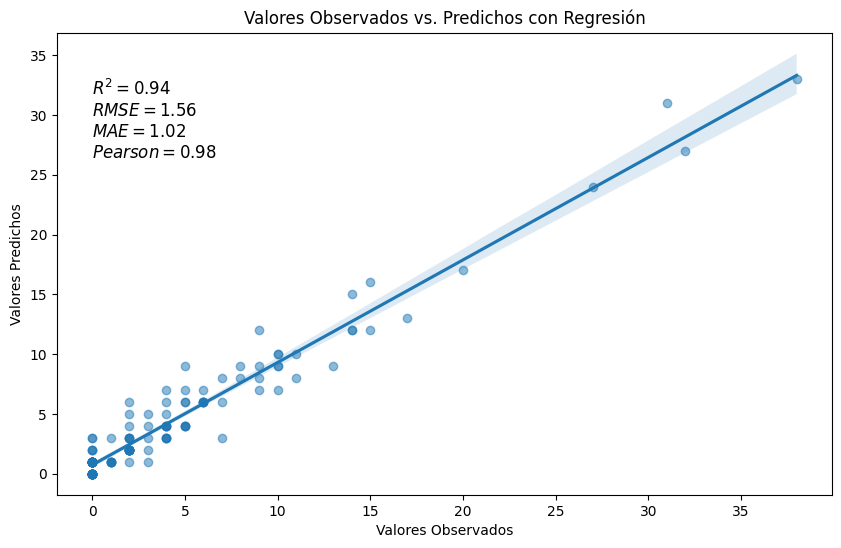

In [7136]:
# Crear un gráfico de Valores Observados vs. Predichos con regresión
plt.figure(figsize=(10, 6))
sns.regplot(x=y_all, y=y_pred_all, scatter_kws={'alpha':0.5})
# plt.plot([min(y_all), max(y_all)], [min(y_all), max(y_all)], color='red', linestyle='--', linewidth=2)
plt.title('Valores Observados vs. Predichos con Regresión')
plt.xlabel('Valores Observados')
plt.ylabel('Valores Predichos')
plt.text(min(y_all), max(y_pred_all), f'$R^2 = {r2:.2f}$\n$RMSE = {rmse:.2f}$\n$MAE = {mae:.2f}$\n$Pearson = {pearson_corr:.2f}$', fontsize=12, verticalalignment='top')
plt.grid(False)
plt.show()




## Correlación de dependientes indeg vs independientes con outdeg e indeg

In [7137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Leer los DataFrames
data_combinada_dep_indeg_out_deg = pd.read_csv('../DataIntermediate/combined_data_dep_variables_indeg_outdeg.csv', sep=',')
data_combinada_indep_indeg_out_deg  = pd.read_csv('../DataIntermediate/combined_data_indep_variables_indeg_outdeg.csv', sep=',')


In [7138]:
# Eliminar la columna 'id' de ambos DataFrames
data_combinada_dep_indeg_out_deg = data_combinada_dep_indeg_out_deg.drop(columns=['id'], errors='ignore')
data_combinada_indep_indeg_out_deg = data_combinada_indep_indeg_out_deg.drop(columns=['id'], errors='ignore')

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Lista de columnas a transformar
columns_to_encode = ['1_VarExp_Moranca', '2_VarExp_Atri_Tabanca']

In [7139]:
# Aplicar LabelEncoder a cada columna en la lista en el DataFrame de variables independientes
for col in columns_to_encode:
    if col in data_combinada_indep_indeg_out_deg.columns:
        data_combinada_indep_indeg_out_deg[col] = label_encoder.fit_transform(data_combinada_indep_indeg_out_deg[col])

# Separar las variables dependientes en indeg y outdeg
dep_indeg = data_combinada_dep_indeg_out_deg.filter(regex='^(Indeg|Deg)')
dep_outdeg = data_combinada_dep_indeg_out_deg.filter(regex='^(OutDeg|Deg)')

# Unir las variables independientes y dependientes en dos DataFrames separados
data_combined_indeg = pd.concat([data_combinada_indep_indeg_out_deg, dep_indeg], axis=1)
data_combined_outdeg = pd.concat([data_combinada_indep_indeg_out_deg, dep_outdeg], axis=1)

# Calcular la matriz de correlación para indeg y outdeg
correlation_matrix_indeg = data_combined_indeg.corr()
correlation_matrix_outdeg = data_combined_outdeg.corr()

# Guardar las matrices de correlación completas en archivos CSV
correlation_matrix_indeg.to_csv('../Pruebas/correlation_matrix_indeg.csv')
correlation_matrix_outdeg.to_csv('../Pruebas/correlation_matrix_outdeg.csv')

# Filtrar las correlaciones significativas (mayores a 0.1 en valor absoluto) para indeg
threshold = 0.05
indeg_vars = dep_indeg.columns
indeg_indep_corr = correlation_matrix_indeg.loc[indeg_vars, data_combinada_indep_indeg_out_deg.columns]


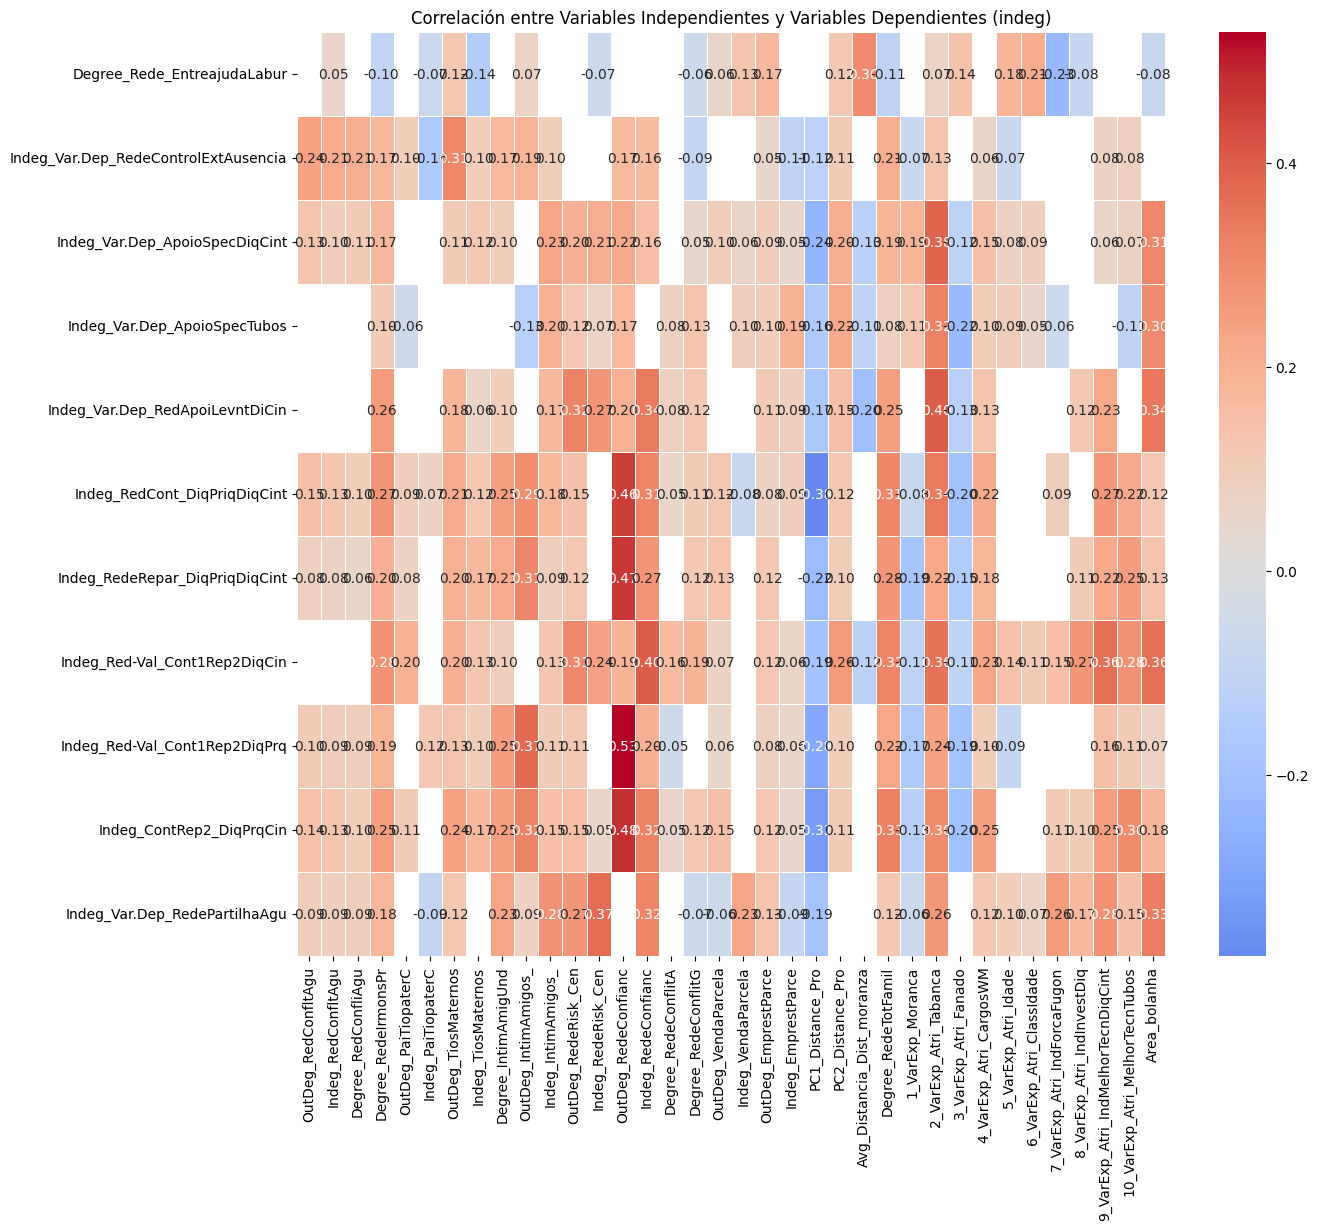

In [7140]:

# Filtrar correlaciones superiores al umbral para indeg
indeg_corr_filtered = indeg_indep_corr[abs(indeg_indep_corr) > threshold]

# Crear un corplot (mapa de calor) de las correlaciones filtradas para indeg
plt.figure(figsize=(14, 12))
sns.heatmap(indeg_corr_filtered, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=.5)
plt.title('Correlación entre Variables Independientes y Variables Dependientes (indeg)')
plt.show()

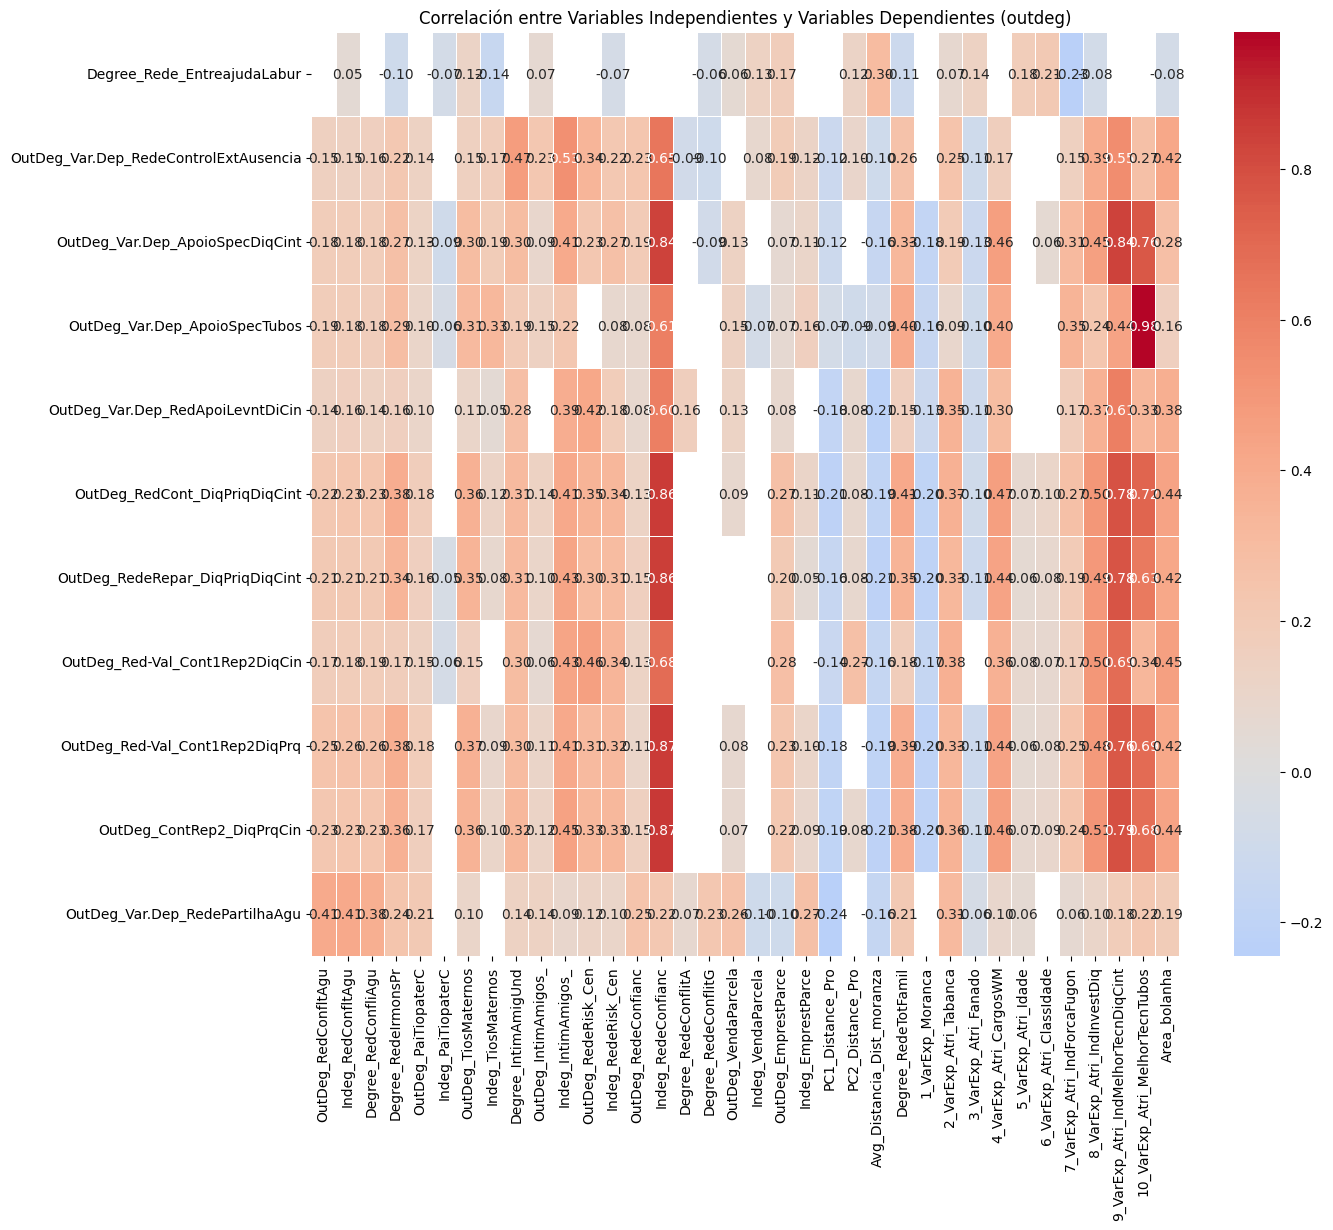

In [7141]:
# Filtrar las correlaciones significativas (mayores a 0.1 en valor absoluto) para outdeg
outdeg_vars = dep_outdeg.columns
outdeg_indep_corr = correlation_matrix_outdeg.loc[outdeg_vars, data_combinada_indep_indeg_out_deg.columns]

# Filtrar correlaciones superiores al umbral para outdeg
outdeg_corr_filtered = outdeg_indep_corr[abs(outdeg_indep_corr) > threshold]
# Crear un corplot (mapa de calor) de las correlaciones filtradas para outdeg
plt.figure(figsize=(14, 12))
sns.heatmap(outdeg_corr_filtered, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=.5)
plt.title('Correlación entre Variables Independientes y Variables Dependientes (outdeg)')
plt.show()